<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/Praktikum_ML/Praktikum_05/"

Mounted at /content/drive


Praktikum kelas

In [ ]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayGolf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("-" * 30)

Original DataFrame:
     Outlook  Temp Humidity  Windy PlayGolf
0      Rainy   Hot     High  False       No
1      Rainy   Hot     High   True       No
2   Overcast   Hot     High  False      Yes
3      Sunny  Mild     High  False      Yes
4      Sunny  Cool   Normal  False      Yes
5      Sunny  Cool   Normal   True       No
6   Overcast  Cool   Normal   True      Yes
7      Rainy  Mild     High  False       No
8      Rainy  Cool   Normal  False      Yes
9      Sunny  Mild   Normal  False      Yes
10     Rainy  Mild   Normal   True       No
11  Overcast  Mild     High   True      Yes
12  Overcast   Hot   Normal  False      Yes
13     Sunny  Mild     High   True       No
------------------------------


In [ ]:
def entropy(target_col):
    """
    Calculates the entropy of a target column.
    """
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = np.sum([(-counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def info_gain(data, split_attribute_name, target_name="PlayGolf"):
    """
    Calculates the information gain of a split attribute.
    """
    # Total entropy before split
    total_entropy = entropy(data[target_name])

    # Values and counts for the split attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Weighted entropy after split
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    # Information Gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
# Cell 4: Calculate and Print Entropy and Information Gain
print(f"Entropy (PlayGolf): {round(entropy(df['PlayGolf']), 4)}")
print("-" * 30)
for col in df.columns[:-1]:
    print(f"Information Gain ({col}): {round(info_gain(df, col), 4)}")
print("-" * 30)

Entropy (PlayGolf): 0.9852
------------------------------
Information Gain (Outlook): 0.3806
Information Gain (Temp): 0.0391
Information Gain (Humidity): 0.0611
Information Gain (Windy): 0.1281
------------------------------


In [ ]:
# Cell 5: Build and Print Decision Tree Structure
# Encode data to numeric
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Separate features and target
X = df_encoded.drop(columns=['PlayGolf'])
y = df_encoded['PlayGolf']

# Create and train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Print the structure of the tree
print("Decision Tree Structure (Text):")
r = export_text(clf, feature_names=list(X.columns))
print(r)
print("-" * 30)

Decision Tree Structure (Text):
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Humidity <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- class: 0

------------------------------


Generating Decision Tree Plot...


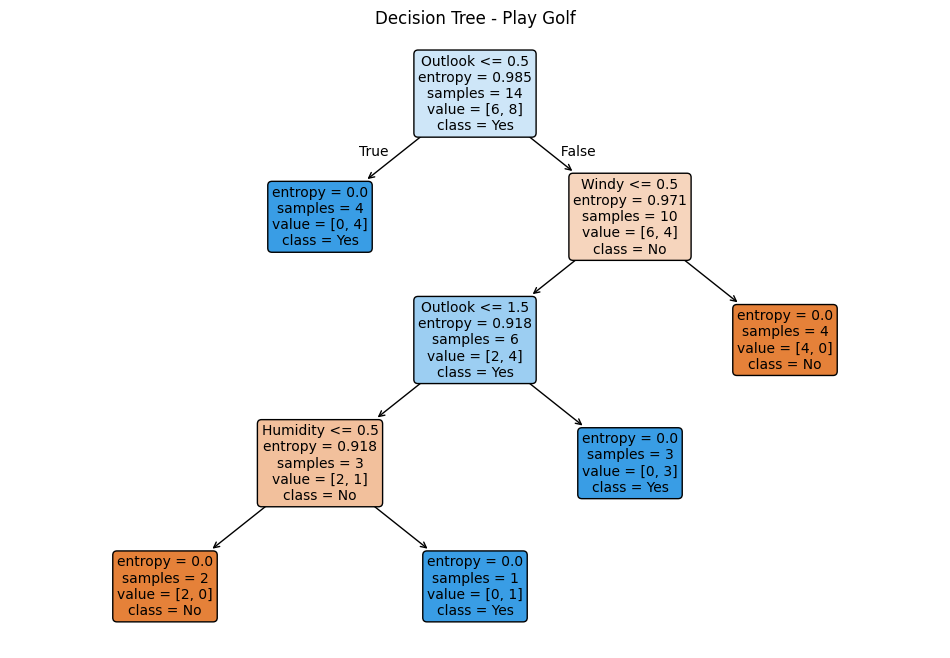

In [ ]:
# Cell 6: Visualize the Decision Tree
print("Generating Decision Tree Plot...")
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=list(X.columns),
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree - Play Golf")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(path + "/Data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
df.duplicated().sum()

np.int64(7308)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.rename(columns={
    'Jenis Kelamin': 'jenis_kelamin',
    'Umur (bulan)': 'umur_bulan',
    'Tinggi Badan (cm)': 'tinggi_cm',
    'Berat Badan (kg)': 'berat_kg',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


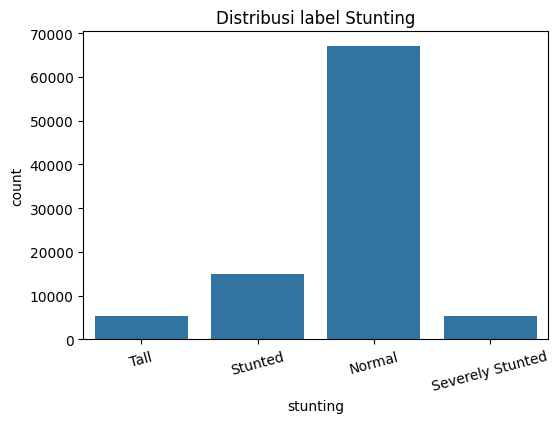

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [ ]:
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


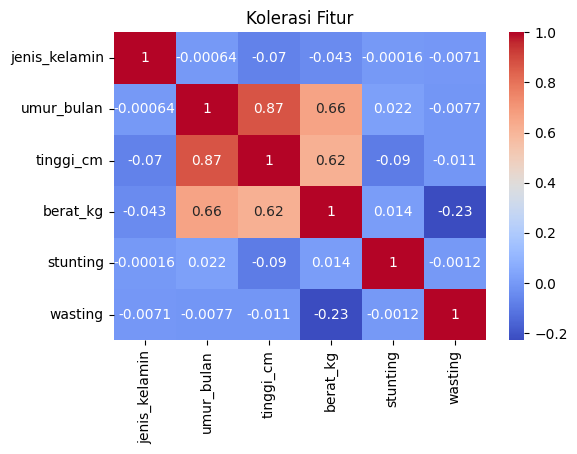

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Kolerasi Fitur')
plt.show()

In [ ]:
feature_cols = ['umur_bulan','tinggi_cm','berat_kg','wasting']
X = df[feature_cols]
y = df['stunting']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )
len(X_train), len(X_test)

(74153, 18539)

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



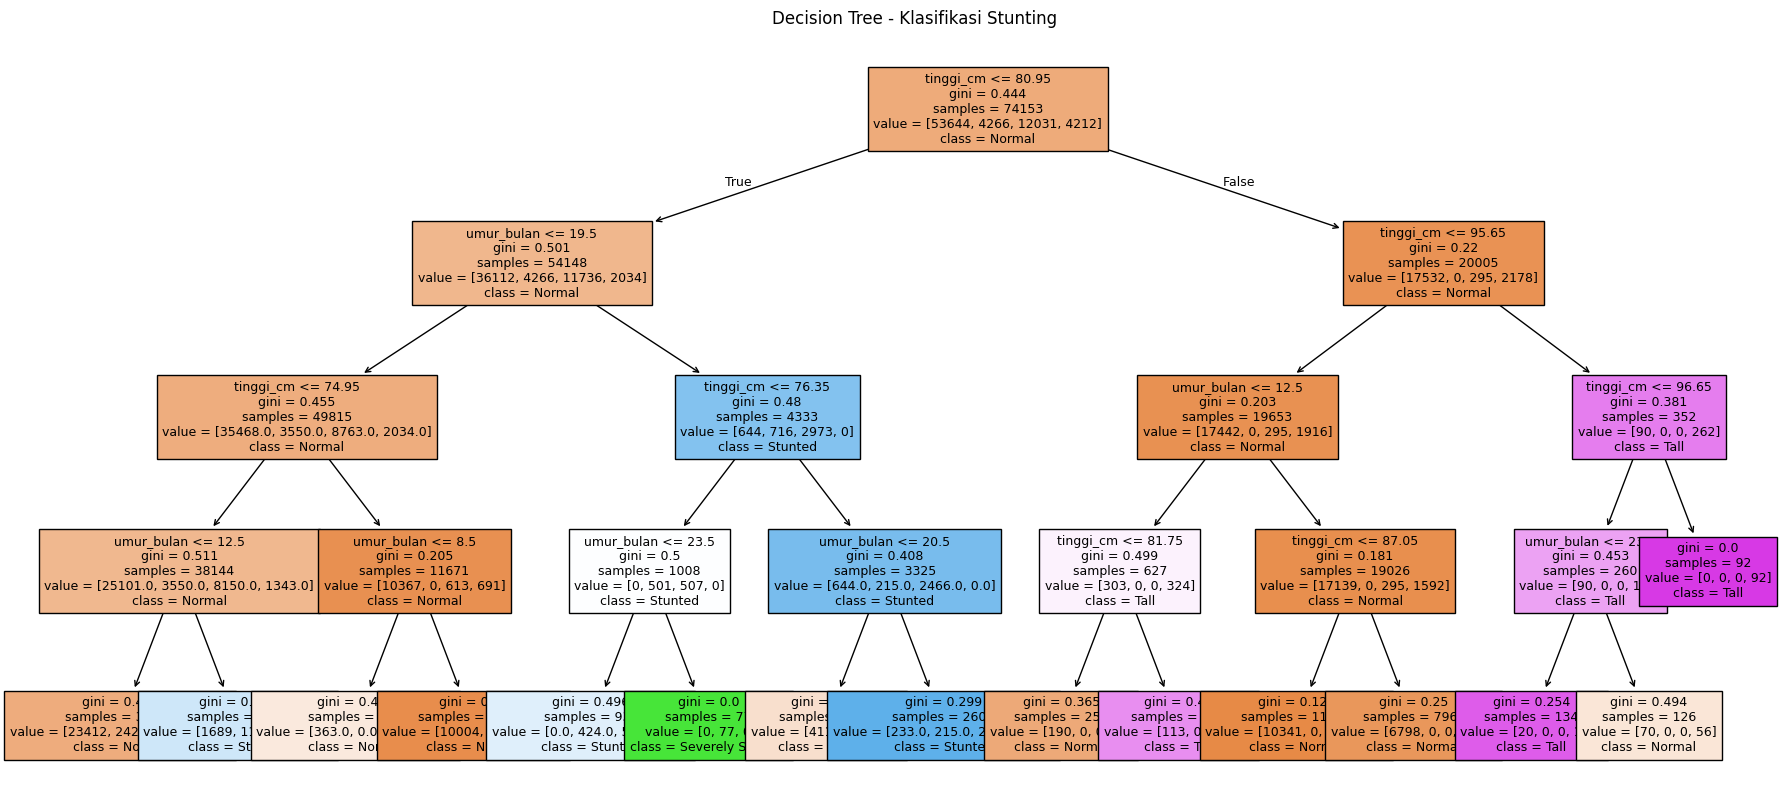

In [ ]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes,
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

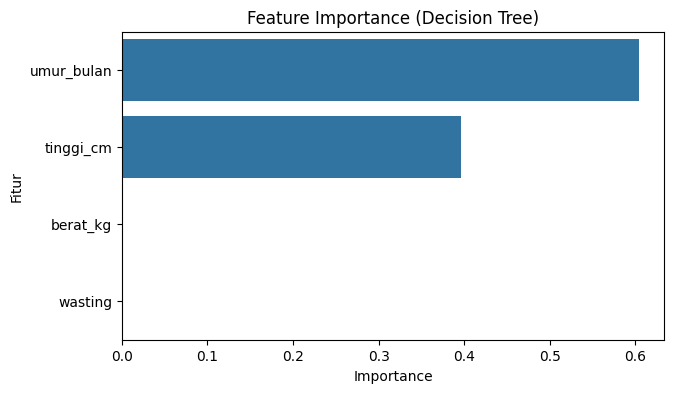

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [ ]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [ ]:
scores = {}
for d in range(2, nine :=9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict (X_test))

  scores
  best_d = max(scores, key=scores.get)
print("Best max_Depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Best max_Depth: 8 | Acc: 84.22 %
